In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

In [8]:
generator = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=0.3,
    zoom_range=0.3,
    brightness_range=(0.3,0.5),
    validation_split=0.2
)

In [9]:
batch_size = 32

In [10]:
train_data = generator.flow_from_directory("dataset/data/", batch_size=32,subset="training",shuffle=True, target_size=(256,256))
val_data = generator.flow_from_directory("dataset/data/", batch_size=32,subset="validation", target_size=(256,256))

Found 900 images belonging to 4 classes.
Found 223 images belonging to 4 classes.


In [11]:
import matplotlib.pyplot as plt

In [12]:
len(train_data), len(val_data)

(29, 7)

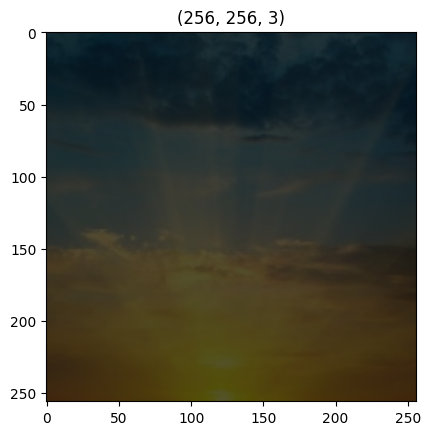

In [22]:
img = train_data[0][0][0]
plt.imshow(img)
plt.title(img.shape)
plt.show()

In [26]:
labels = train_data.class_indices
labels

{'cloudy': 0, 'rain': 1, 'shine': 2, 'sunrise': 3}

In [27]:
input_t = keras.layers.Input((256,256,3))
res_model = ResNet50(include_top=False, weights="imagenet",input_tensor=input_t)

2024-01-05 17:57:33.571745: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-05 17:57:36.834166: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-05 17:57:36.834223: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-05 17:57:36.837426: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-05 17:57:36.837482: I external/local_xla/xla/stream_executor

In [49]:
for layer in res_model.layers[:143]:
    layer.trainable = False

In [54]:
for i, layers in enumerate(res_model.layers[:143]):
    print(i, layers.name, ' - ', layers.trainable)

0 input_1  -  False
1 conv1_pad  -  False
2 conv1_conv  -  False
3 conv1_bn  -  False
4 conv1_relu  -  False
5 pool1_pad  -  False
6 pool1_pool  -  False
7 conv2_block1_1_conv  -  False
8 conv2_block1_1_bn  -  False
9 conv2_block1_1_relu  -  False
10 conv2_block1_2_conv  -  False
11 conv2_block1_2_bn  -  False
12 conv2_block1_2_relu  -  False
13 conv2_block1_0_conv  -  False
14 conv2_block1_3_conv  -  False
15 conv2_block1_0_bn  -  False
16 conv2_block1_3_bn  -  False
17 conv2_block1_add  -  False
18 conv2_block1_out  -  False
19 conv2_block2_1_conv  -  False
20 conv2_block2_1_bn  -  False
21 conv2_block2_1_relu  -  False
22 conv2_block2_2_conv  -  False
23 conv2_block2_2_bn  -  False
24 conv2_block2_2_relu  -  False
25 conv2_block2_3_conv  -  False
26 conv2_block2_3_bn  -  False
27 conv2_block2_add  -  False
28 conv2_block2_out  -  False
29 conv2_block3_1_conv  -  False
30 conv2_block3_1_bn  -  False
31 conv2_block3_1_relu  -  False
32 conv2_block3_2_conv  -  False
33 conv2_block3_2_b

In [62]:
model = keras.models.Sequential()
model.add(res_model)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(4, activation="softmax"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 flatten_3 (Flatten)         (None, 131072)            0         
                                                                 
 dense_3 (Dense)             (None, 4)                 524292    
                                                                 
Total params: 24112004 (91.98 MB)
Trainable params: 524292 (2.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [63]:
checkpoint = keras.callbacks.ModelCheckpoint(filepath="trained_on_resnet50.keras",
                                            monitor="val_accuracy",
                                            mode="max",
                                            save_best_only=True)

In [64]:
model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=2e-3), metrics=["accuracy"]) 

In [65]:
epoch = 50

history = model.fit(train_data, batch_size=batch_size, epochs=epoch, validation_data = val_data, callbacks=[checkpoint])

Epoch 1/50
29/29 [==============================] - 30s 919ms/step - loss: 16.1871 - accuracy: 0.2833 - val_loss: 11.8731 - val_accuracy: 0.2242
Epoch 2/50
29/29 [==============================] - 26s 879ms/step - loss: 9.6354 - accuracy: 0.2656 - val_loss: 9.3079 - val_accuracy: 0.2287
Epoch 3/50
29/29 [==============================] - 28s 971ms/step - loss: 6.3375 - accuracy: 0.2800 - val_loss: 6.6176 - val_accuracy: 0.3408
Epoch 4/50
29/29 [==============================] - 27s 930ms/step - loss: 7.6883 - accuracy: 0.2644 - val_loss: 7.8520 - val_accuracy: 0.2915
Epoch 5/50
29/29 [==============================] - 28s 969ms/step - loss: 5.2372 - accuracy: 0.3411 - val_loss: 2.3986 - val_accuracy: 0.3587
Epoch 6/50
29/29 [==============================] - 25s 863ms/step - loss: 3.6148 - accuracy: 0.3456 - val_loss: 5.0343 - val_accuracy: 0.3274
Epoch 7/50
29/29 [==============================] - 26s 885ms/step - loss: 4.0801 - accuracy: 0.2844 - val_loss: 2.5434 - val_accuracy: 0.37

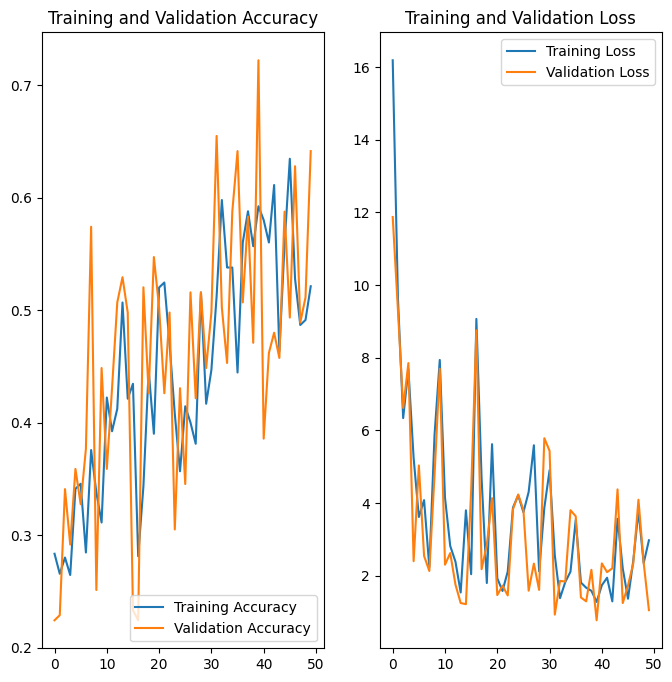

In [66]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epoch)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [67]:
model.evaluate(val_data)

7/7 [==============================] - 4s 429ms/step - loss: 1.1597 - accuracy: 0.6188


[1.1597298383712769, 0.6188340783119202]

In [68]:
model.save("models/trained_on_resnet50.keras")

In [69]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [102]:
img = load_img("test_img/sunrise2.jpg", target_size=(256,256))
imgarr = img_to_array(img)
imgarr = tf.expand_dims(imgarr,0)
imgarr.shape

TensorShape([1, 256, 256, 3])

In [103]:
yhat = model.predict(imgarr)

1/1 [==============================] - 0s 23ms/step


In [104]:
class_names = ['cloudy', 'rain', 'shine', 'sunrise']

In [105]:
import numpy as np

In [106]:
score = tf.nn.softmax(yhat[0])

In [107]:
class_names[np.argmax(score)]

'sunrise'